In [1]:
from keras.datasets import fashion_mnist
((train_images, train_labels), (test_images, test_labels)) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [2]:

# import noise layer
from keras.layers import GaussianNoise
# define noise layer
layer = GaussianNoise(0.1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

In [0]:
from tensorflow import keras
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)
train_images: (60000, 28, 28)
test_images: (10000, 28, 28)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


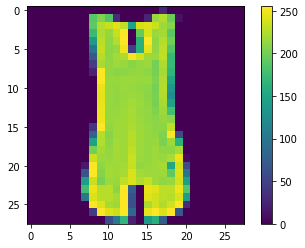

In [8]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)

In [0]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),keras.layers.GaussianNoise(0.5),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/sample - loss: 0.6714 - acc: 0.7542 - val_loss: 0.5195 - val_acc: 0.8086
Epoch 2/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5519 - acc: 0.7920 - val_loss: 0.4680 - val_acc: 0.8323
Epoch 3/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5205 - acc: 0.8048 - val_loss: 0.4460 - val_acc: 0.8403
Epoch 4/20
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5046 - acc: 0.8103 - val_loss: 0.4315 - val_acc: 0.8476
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4911 - acc: 0.8151 - val_loss: 0.4197 - val_acc: 0.8453
Epoch 6/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4859 - acc: 0.8181 - val_loss: 0.4187 - val_acc: 0.8457
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4757 - acc: 0.8207 - val_loss: 0.

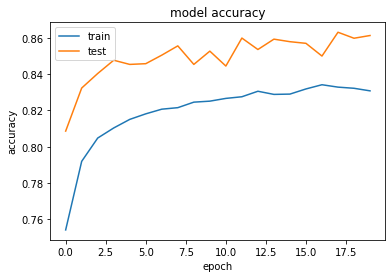

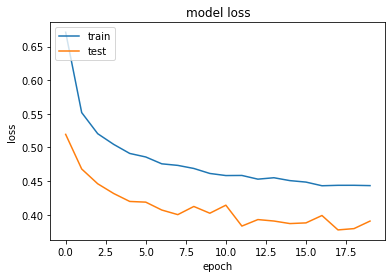

In [12]:
history = model_3.fit(train_images, train_labels, validation_split=0,validation_data = (test_images,test_labels), epochs=20)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model_3.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4367 - acc: 0.8346 - val_loss: 0.3421 - val_acc: 0.8770
Epoch 2/20
48000/48000 [==============================] - 3s 71us/sample - loss: 0.4353 - acc: 0.8386 - val_loss: 0.3373 - val_acc: 0.8747
Epoch 3/20
48000/48000 [==============================] - 3s 70us/sample - loss: 0.4377 - acc: 0.8342 - val_loss: 0.3545 - val_acc: 0.8683
Epoch 4/20
48000/48000 [==============================] - 3s 70us/sample - loss: 0.4312 - acc: 0.8382 - val_loss: 0.3485 - val_acc: 0.8688
Epoch 5/20
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4352 - acc: 0.8364 - val_loss: 0.3462 - val_acc: 0.8732
Epoch 6/20
48000/48000 [==============================] - 3s 68us/sample - loss: 0.4285 - acc: 0.8387 - val_loss: 0.3564 - val_acc: 0.8701
Epoch 7/20
48000/48000 [==============================] - 3s 72us/sample - loss: 0.4341 - acc: 0.8374 - val_loss: 0.

In [14]:
test_loss, test_acc = model_3.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3734 - acc: 0.8664


In [0]:
import numpy as np
y_pred = model_3.predict_classes(test_images)
con_mat = tf.confusion_matrix(labels=test_labels, predictions=y_pred)

In [16]:
sess = tf.Session()
with sess.as_default():
        print(sess.run(con_mat))

[[851   1  18  34   4   0  81   1   9   1]
 [  3 963   2  27   2   0   2   0   1   0]
 [ 16   1 767  18 119   0  77   0   2   0]
 [ 26   2   5 928  14   0  21   0   4   0]
 [  1   0  72  70 797   0  58   0   2   0]
 [  0   0   0   1   0 868   0  86   0  45]
 [166   0 101  39  73   0 604   0  17   0]
 [  0   0   0   0   0   6   0 952   0  42]
 [  3   0   4   5   4   0   2   7 975   0]
 [  1   0   0   0   0   2   0  38   0 959]]


In [0]:
model_3.save('DNN.h5')

In [0]:
from platform import python_version
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K


In [0]:
row = 28
col = 28
N_class = 10
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(row,col , 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(N_class))
model.add(Activation('softmax'))


In [20]:
›
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='accuracy',verbose=1)]

model.fit(train_images, train_labels, epochs=30, validation_split=0.2)
model.save('CNN.h5')

SyntaxError: ignored

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)